Набор данных: "Успеваемость учащихся" (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly import express as px
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
data.shape

(1000, 8)

In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
data.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [6]:
# отбор числовых колонок
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
numeric_cols

array(['math score', 'reading score', 'writing score'], dtype=object)

In [7]:
# отбор нечисловых колонок
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
non_numeric_cols

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'], dtype=object)

In [8]:
# Просмотр уникальных категориальных данных
for column in data.select_dtypes(include=['object']):
    print(column, data[column].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#процент пропущенных данных
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

gender - 0%
race/ethnicity - 0%
parental level of education - 0%
lunch - 0%
test preparation course - 0%
math score - 0%
reading score - 0%
writing score - 0%


In [3]:
scale_features_std = StandardScaler()

list = ['math score', 'reading score', 'writing score']
features_std = scale_features_std.fit_transform(data[list])
xm = features_std.transpose()
mean_scale =[np.mean(xm[i]) for i in range(3)]
print("Максимальное среднее значение", list[mean_scale.index(max(mean_scale))], max(mean_scale)) 


Максимальное среднее значение reading score 2.1671553440683055e-16


In [4]:
data1 = pd.get_dummies(data)
data1.head(5)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


In [13]:
pd.DataFrame.corr(data1).head(3)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946


In [37]:
data_ = data.loc[:, data.columns.isin(['math score', 'reading score', 'writing score'])]

In [38]:
data_.shape

(1000, 3)

In [53]:
import scipy.stats as stats
z = np.abs(stats.zscore(data_))
data_clean = data_[((z>3)).all(axis=1)]
data_clean.shape

(1, 3)

In [44]:
data_clean

,math score,reading score,writing score
59,0,17,10


In [5]:
target = data1['math score']
train = data1.drop(['math score', 'reading score', 'writing score', 'gender_female', 'race/ethnicity_group A', "parental level of education_associate's degree", 'lunch_standard', 'test preparation course_completed'], axis=1) #удалим линейно-зависимые из выборки

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state=42)
print (X_train.shape[0], X_test.shape[0])

700 300


In [16]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [17]:
a=0.0
for i, component in enumerate(pca.components_):
    a+=round(100 * pca.explained_variance_ratio_[i],2)
    print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(a,'%')
    if a>=90:
        break
    if i==0:
        print(" + ".join("%.3f * %s" % (value, name) for value, name in zip(component,train.columns)))

1 component: 14.7% of initial variance
14.7 %
-0.159 * gender_male + -0.110 * race/ethnicity_group B + 0.777 * race/ethnicity_group C + -0.569 * race/ethnicity_group D + -0.069 * race/ethnicity_group E + 0.009 * parental level of education_bachelor's degree + 0.108 * parental level of education_high school + -0.017 * parental level of education_master's degree + -0.020 * parental level of education_some college + -0.097 * parental level of education_some high school + -0.073 * lunch_free/reduced + -0.049 * test preparation course_none
2 component: 12.33% of initial variance
27.03 %
3 component: 11.93% of initial variance
38.96 %
4 component: 11.15% of initial variance
50.11 %
5 component: 10.84% of initial variance
60.95 %
6 component: 9.88% of initial variance
70.83 %
7 component: 8.72% of initial variance
79.55 %
8 component: 7.93% of initial variance
87.47999999999999 %
9 component: 6.69% of initial variance
94.16999999999999 %


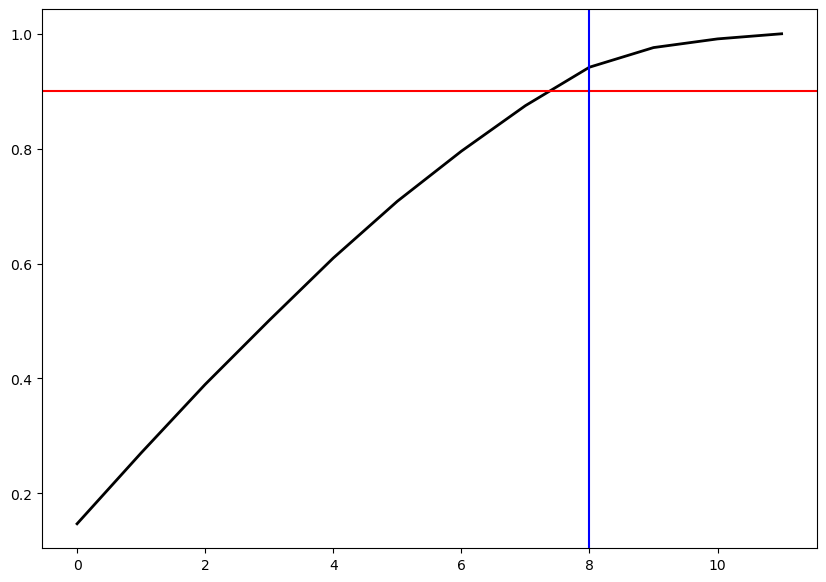

In [18]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(8, c='b')

In [19]:
tsne_model = TSNE(n_components=2, learning_rate='auto', random_state=0)
X_tsne = tsne_model.fit_transform(features_std)

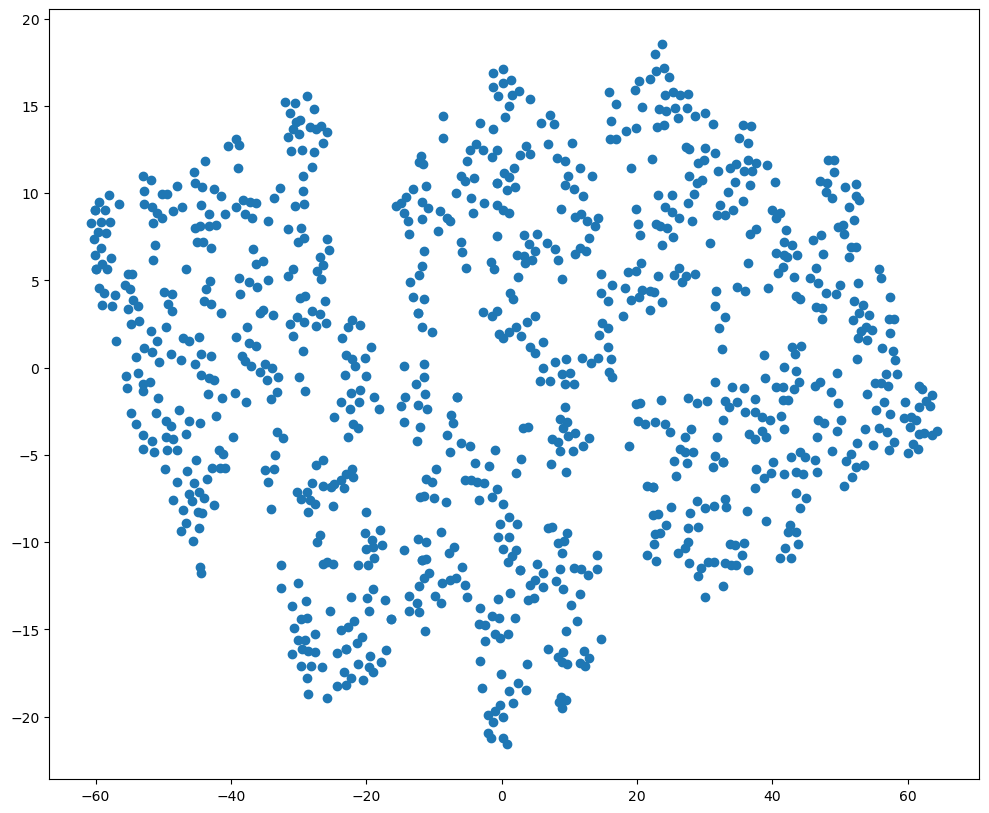

In [20]:
plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

1. В наборе данных 1000 объектов и 8 признаков. (Авторами набора данных описание признаков не предусмотрено)
    1) gender - пол
        female - женский
        male - мужсклй
    2) race/ethnicity - раса
        According to Data Dictionary on National Codes for ethnicity the groups signify the following;
        Group A - White - British
        Group B - White - Irish
        Group C - White - Any other White background
        Group D - Mixed - White and Black Caribbean
        Group E - Mixed - White and Black African
        Group F - Mixed - White and Asian
        Group G - Mixed - Any other mixed background
    3) parental level of education - уровень обазования родителей
        bachelor's degree - закончил(а) бакалавриат
        some college - закончил(а) колледж 
        master's degree - закончил(а) магистратуру
        associate's degree - степень младшего специалиста
        high school - закончил(а) среднюю школу
        some high school - ... (возможно неоконченная средняя школа)
    4) lunch - обед
        standard - стандартный обед
        free/reduced - бесплатный/скидочный обед
    5) test preparation course - курс подготовки к экзаменам
        none - не проходил(а)
        completed - проходил(а)
    6) math score - оценки по математике (от 0 до 100)
    7) reading score - оценки по чтению (от 0 до 100)
    8) writing score - оценки по письму (от 0 до 100)

2. 2 категореальных признака: 'race/ethnicity', 'parental level of education'
3. Столбец с максимальным количеством уникальных значений категориального признака - 'parental level of education', 6 значений
4. 'gender', 'lunch', 'test preparation' - бинарные признаки
5. 'math score', 'reading score', 'writing score' - числовые признаки

6,7,8. пропусков нет

9. выбросов в данных нет
10. Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение - 'reading score'
    Макисмальное среднее  =  2.1671553440683055e-16 - после нормализации;
                             69.169000 - до нормализации
11. Целевые признаки: 'math score', 'reading score', 'writing score' (будем использовать 'math score')
12. При использовании train_test_split с параметрами test_size = 0.3, random_state = 42, для каждого из целевых признаков в тренировочную выборку попадают 700 объектов
13. Сильно коррелируют между собой 3 признака: 'math score', 'reading score', 'writing score'
    друг с другом у всех corr>80%
14. Для описания 90% дисперсии данных достаточно 9 компонентов.
15. 'race/ethnicity_group C' вносит наибольший вклад в первую компоненту
16. Визуально данные можно разделить на 4 кластера.